In [11]:
!pip install python-igraph
!pip install matplotlib
!pip install seaborn
from igraph import *
import igraph
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import seaborn as sns
plt.style.use('bmh')

In [12]:
## Download alle snapshots (uncomment degene die ge nodig hebt)
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jan_17.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jul_19.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/mar_21.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/may_20.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/sep_18.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/nov_17.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jan_17_sample.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jul_19_sample.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/mar_21_sample.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/may_20_sample.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/sep_18_sample.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/nov_17_sample.txt

--2021-04-26 14:58:55--  https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jan_17.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/QuintenBruynseraede/ALSSN/main/code/snapshots/jan_17.txt [following]
--2021-04-26 14:58:55--  https://raw.githubusercontent.com/QuintenBruynseraede/ALSSN/main/code/snapshots/jan_17.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19739850 (19M) [text/plain]
Saving to: ‘jan_17.txt’

jan_17.txt          100%[===================>]  18.83M  52.0MB/s    in 0.4s    

Last-modified header missing -- time-stamps turned off.
2021-04-26 14:58:56 (52.0 

In [13]:
!ls snapshots

ls: cannot access 'snapshots': No such file or directory


## Degree distribution plot

In [15]:
# jan_17.txt nov_17.txt sep_18.txt jul_19.txt may_20.txt mar_21.txt  
file = "nov_17.txt"
g = Graph.Read_Ncol(file, directed=True)

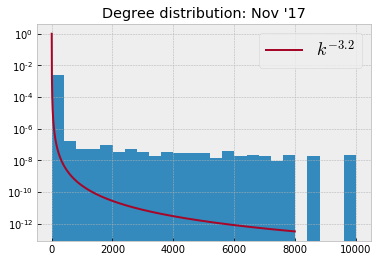

In [ ]:
degree = g.degree()

# Create log histogram
x,bins,p = plt.hist(degree, bins=25,density=True)
plt.yscale("log")
plt.title("Degree distribution: Nov '17")

# Add power law curve and create legend
exp = -3.2
plt.plot(range(1,8000),[t**(exp) for t in range(1,8000)],label=r'$k^{'+str(exp)+'}$')
plt.legend(prop={'size': 18})

plt.savefig("plots/degree_dist_{}.pdf".format(file[:-4]),bbox_inches="tight")

## Indegree/outdegree

In [ ]:
# jan_17.txt nov_17.txt sep_18.txt jul_19.txt may_20.txt mar_21.txt  
for file in os.listdir("snapshots"):
    if not file.endswith(".txt"):
        continue
    print(file)
    g = Graph.Read_Ncol("snapshots/"+file, directed=True)

    in_degree = g.indegree()
    out_degree = g.outdegree()

    # Create log histogram
    print(sum(in_degree))
    print(sum(out_degree))

# Add power law curve and create legend
# exp = -3.2
# plt.plot(range(1,8000),[t**(exp) for t in range(1,8000)],label=r'$k^{'+str(exp)+'}$')
# plt.legend(prop={'size': 18})

# plt.savefig("plots/degree_dist_{}.pdf".format(file[:-4]),bbox_inches="tight")

mar_21.txt
701482
701482
may_20.txt
580773
580773
jan_17.txt
186942
186942
jul_19.txt
673967
673967
balances.txt
0
0
sep_18.txt
635623
635623
nov_17.txt
657697
657697


## Transaction volume

jan_17.txt
nov_17.txt
sep_18.txt
jul_19.txt
may_20.txt
mar_21.txt


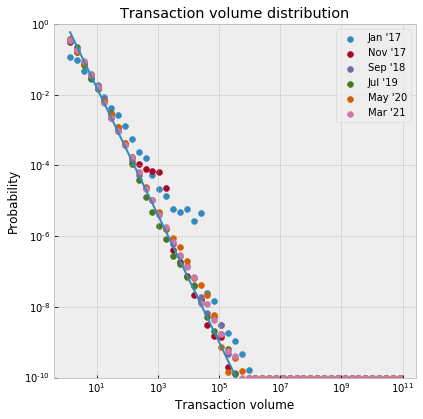

In [ ]:
for i in range(6):
    file = ["jan_17.txt","nov_17.txt","sep_18.txt","jul_19.txt","may_20.txt","mar_21.txt"][i]
    label = ["Jan '17", "Nov '17", "Sep '18", "Jul '19", "May '20", "Mar '21"][i]
    if not file.endswith(".txt") or "balance" in file:
        continue

    print(file)
    # Create graph
    g = Graph.Read_Ncol("snapshots/"+file, directed=True)

    # Collect volumes in list
    vol = []
    for v in g.vs():
        vol.append(sum([g.es[e]["weight"] for e in g.incident(v,mode="out")]))
    vol = list(map(lambda x: x/1e18,vol))

    # Calculate distribution in logarithmically scaled bins
    ls = np.logspace(0,11,num=50)
    y,bins = np.histogram(vol,ls,density=True)
    x = [(ls[i]+ls[i+1])/2 for i in range(len(ls)-1)]
    
    # Give zeroes a very small positive value
    for i in range(len(y)):
        if y[i] == 0:
            y[i] = 1e-10

    # Scatter
    plt.scatter(x,y,label=label)

# Setup loglog plot with labels and titles
plt.plot(x,[k**(-1.80) for k in x])
plt.ylim(1e-10,1e0)
plt.yscale("log")
plt.legend()
plt.xscale('log')
plt.title("Transaction volume distribution")
plt.xlabel("Transaction volume")
plt.ylabel("Probability")
fig = plt.gcf()
fig.set_size_inches(6.5, 6.5)
plt.savefig("plots/transaction_volume.pdf",bbox_inches="tight")

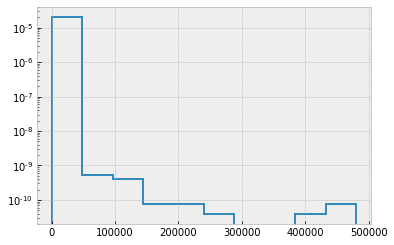

In [ ]:
plt.hist(vol,density=True,histtype="step",linewidth=2)
plt.yscale("log")

## Number of whales and whales subgraph


In [ ]:
whales_addr = set()
with open("top_1000_addresses.txt","r") as f:
    while True:
        line = f.readline()[:-1]
        if not line:
            print("End of file.")
            break
        whales_addr.add(line)

End of file.


In [ ]:
file = "mar_21.txt"

# Create graph
g = Graph.Read_Ncol("snapshots/"+file, directed=True)
whales = [n for n in g.vs() if n["name"] in whales_addr]
not_whales = [n for n in g.vs() if n["name"] not in whales_addr]

# Find whales and their neighbors + create subgraph
whales_neighborhood = set(whales)
for w in whales:
    whales_neighborhood = whales_neighborhood.union(g.neighbors(w))
whales_subgraph = g.subgraph(whales_neighborhood)
only_whales_subgraph = g.subgraph(whales)

In [ ]:
whales_subgraph.summary()

'IGRAPH DNW- 80425 96248 -- \n+ attr: name (v), weight (e)'

In [ ]:
d = whales_subgraph.degree()
spl = whales_subgraph.average_path_length()
t = whales_subgraph.transitivity_undirected()
print(spl)
print(t)

6.426098883758849
1.1097885942161532e-05


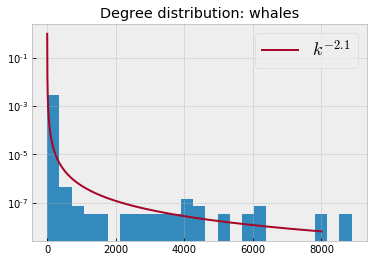

In [ ]:
# Create log histogram
x,bins,p = plt.hist(d, bins=25,density=True)
plt.yscale("log")
plt.title("Degree distribution: whales and neighborhood")

# Add power law curve and create legend
exp = -2.1
plt.plot(range(1,8000),[t**(exp) for t in range(1,8000)],label=r'$k^{'+str(exp)+'}$')
plt.legend(prop={'size': 18})

plt.savefig("plots/degree_dist_whales.pdf",bbox_inches="tight")

1.8421052631578947
0.05555555555555555
4


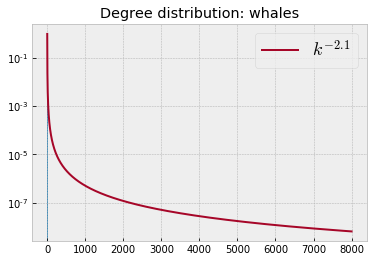

In [ ]:
d = only_whales_subgraph.degree()
spl = only_whales_subgraph.average_path_length()
t = only_whales_subgraph.transitivity_undirected()
diam = only_whales_subgraph.diameter()
print(spl)
print(t)
print(diam)

# Create log histogram
x,bins,p = plt.hist(d, bins=25,density=True)
plt.yscale("log")
plt.title("Degree distribution: whales")

# Add power law curve and create legend
exp = -2.1
plt.plot(range(1,8000),[t**(exp) for t in range(1,8000)],label=r'$k^{'+str(exp)+'}$')
plt.legend(prop={'size': 18})

plt.savefig("plots/degree_dist_whales_only.pdf",bbox_inches="tight")

## Transaction volume of whales

In [ ]:
whales_addr = set()
with open("top_1000_addresses.txt","r") as f:
    while True:
        line = f.readline()[:-1]
        if not line:
            print("End of file.")
            break
        whales_addr.add(line)

file = "mar_21.txt"
g = Graph.Read_Ncol("snapshots/"+file, directed=True)
whales_vol = 0
nonwhales_vol = 0
whales_trades = 0
nonwhales_trades = 0
for e in g.es():
    if g.vs()[e.source]["name"] in whales_addr:
        whales_vol += e["weight"]
        whales_trades += 1 
    else:
        nonwhales_vol += e["weight"]
        nonwhales_trades += 1

print(whales_vol,nonwhales_vol, whales_vol/(whales_vol+nonwhales_vol))
print(whales_trades,nonwhales_trades, whales_trades/(whales_trades+nonwhales_trades))

End of file.
2.3371528679958169e+24 6.923425552961214e+24 0.2523765537913651
53565 647917 0.07635976404241306


## Code for other metrics

In [ ]:
# Calculate some properties:
degree = g.degree()
betw = g.betweenness()
apl = g.average_path_length()
cls = g.closeness()
pgrnk = g.pagerank()
clcof = g.transitivity_undirected()


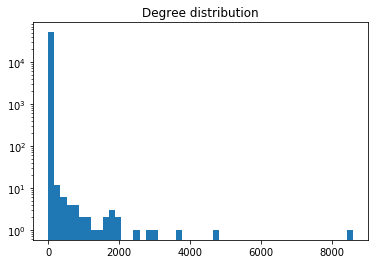

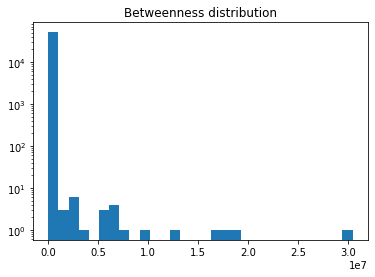

APL: 5.214216547223317


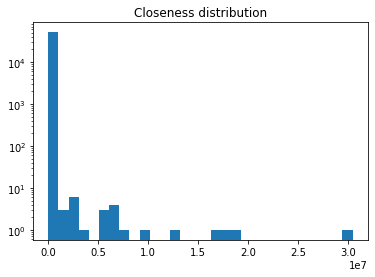

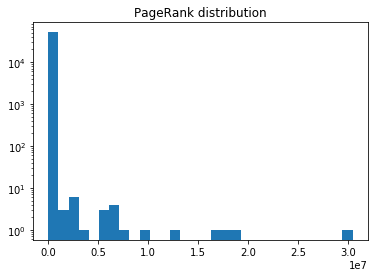

Transitivity_undirected: 2.3576329557488363e-06


In [ ]:
# All functions: https://igraph.org/python/doc/api/igraph.Graph.html
plt.hist(degree, bins=50)
plt.yscale("log")
plt.title("Degree distribution")
plt.show()

plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("Betweenness distribution")
plt.show()

print("APL: {}".format(apl))

# Simple Histogram of closeness distribution
plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("Closeness distribution")
plt.show()

# Simple Histogram of PageRank distribution
plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("PageRank distribution")
plt.show()

print("Transitivity_undirected: {}".format(clcof))

## Transitivity as measure for clusteringness

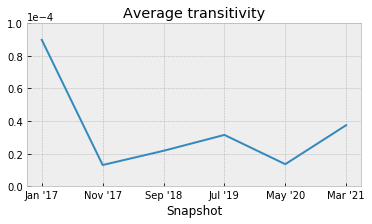

In [ ]:
x = range(6)
y = [8.979131831293448e-05,1.305370093077275e-05,2.1773902094144812e-05,3.150763008229304e-05,1.355142321454942e-05,3.747405255138334e-05]
plt.plot(x,y)
plt.title("Average transitivity")
plt.xlabel("Snapshot")
plt.xticks(range(6),["Jan '17", "Nov '17", "Sep '18", "Jul '19", "May '20", "Mar '21"])
plt.ylim((0,1e-4))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
f = plt.gcf()
f.set_size_inches(6,3)
plt.savefig("plots/transitivity.pdf",bbox_inches="tight")

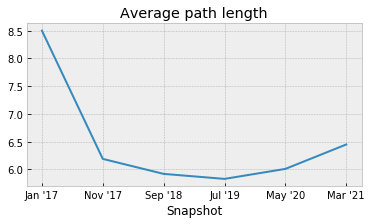

In [ ]:
x = range(6)
y = [8.5, 6.19, 5.92, 5.83, 6.01, 6.45]
plt.plot(x,y)
plt.title("Average path length")
plt.xlabel("Snapshot")
plt.xticks(range(6),["Jan '17", "Nov '17", "Sep '18", "Jul '19", "May '20", "Mar '21"])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
f = plt.gcf()
f.set_size_inches(6,3)
plt.savefig("plots/average_path.pdf",bbox_inches="tight")

In [ ]:
file = "mar_21.txt"
# Create graph
for file in os.listdir("snapshots"):
    g = Graph.Read_Ncol("snapshots/"+file, directed=True)
    # print("{} nodes, {} edges".format(len(g.vs()),len(g.es())))
    print(file)
    # print("transitivity: {}".format(g.transitivity_undirected()))
    # print("diameter: {}".format(g.diameter()))
    print("avg path length: {}".format(g.average_path_length()))

# jan_17.txt
# transitivity: 8.979131831293448e-05
# diameter: 38
# avg path length: 8.500705048368546
# nov_17.txt
# transitivity: 1.305370093077275e-05
# diameter: 43
# avg path length: 8.500705048368546
# sep_18.txt
# transitivity: 2.1773902094144812e-05
# diameter: 21
# avg path length: 5.928087756391317
# jul_19.txt
# transitivity: 3.150763008229304e-05
# diameter: 19
# avg path length: 5.838516279371158
# may_20.txt
# transitivity: 1.355142321454942e-05
# diameter: 24
# avg path length: 6.016498490810574
# mar_21.txt
# transitivity: 3.747405255138334e-05
# diameter: 22
# avg path length: 6.458825138104836

FileNotFoundError: ignored

## Visualize

In [ ]:
file = "proposal_structure.txt"
# Create graph

print("{} nodes, {} edges".format(len(g.vs()),len(g.es())))

layout = g.layout(layout='auto')
visual_style = {}
visual_style["vertex_size"] = 25
max_weight = math.log(max(g.es["weight"]))

for n in g.vs():
    if len(n["name"]) > 1:
        n["color"] = "rgba(0,255,0,1)"
    else:
        n["color"] = "rgba(255,0,0,1)"
# Scale edge_widths logarithmically to suppress large ranges
# visual_style["edge_width"] = [0.1+(1.0*math.log(weight)/max_weight) for weight in g.es["weight"]]
visual_style["edge_width"] = [1]
visual_style["edge_arrow_size"] = 0.2
visual_style["layout"] = layout
visual_style["bbox"] = (1000, 500)
visual_style["margin"] = 20
visual_style["node_color"] = "blue"
plot(g, **visual_style, target='plots/plot.pdf',edge_color="rgba(0,0,0,1)")
print("Wrote graph plot to plot.pdf")

548355 nodes, 657697 edges


SystemError: ignored

In [ ]:
import pickle
x = pickle.load(open("balances.pckl",'rb'))

In [ ]:
print(list(x)[:100])

['0x1e2fcfd26d36183f1a5d90f0e6296915b02bcb40 0x167a9333bf582556f35bd4d16a7e80e191aa6476 40000000000000000000000\n', '0x002ea31c7d9d19179d2c7a61ec8e4de1a40c610c 0x167a9333bf582556f35bd4d16a7e80e191aa6476 1013978800000000000\n', '0x009276fc3fe9e62560390c6aaa56cbd2cca1df73 0x167a9333bf582556f35bd4d16a7e80e191aa6476 1442555478515278451\n', '0x00edc77ede437a247d7ce11416993f9b9e5d550f 0x167a9333bf582556f35bd4d16a7e80e191aa6476 1005516789997600000\n', '0x01182652b4a7c5801809e14c6b4fbded4c306ebf 0x167a9333bf582556f35bd4d16a7e80e191aa6476 164775961480249799000\n', '0x013bd7324043aa2ca74770f65839c4ccd31b4285 0x167a9333bf582556f35bd4d16a7e80e191aa6476 8987230790372994000\n', '0x013e7b26e015d13772ecbf492fa832e26d197b03 0x167a9333bf582556f35bd4d16a7e80e191aa6476 3271955660000000000\n', '0x015b8842df8bd8b1fdd06c602a5c4c83cf671d5a 0x167a9333bf582556f35bd4d16a7e80e191aa6476 1407218039356260000\n', '0x0191a0190880f7ae796c879c0c8fa43be583a123 0x167a9333bf582556f35bd4d16a7e80e191aa6476 302043362000000000

In [21]:

file1 = "jan_17_sample.txt"
g1 = Graph.Read_Ncol(file1, directed=True)
g1.save("Subnetwork1_edges", format = "net")

g1.save("Subnetwork1_nodes", format = "pajek")
g1.save("Subnetwork_ncol", format = "ncol" )


file2 = "nov_17_sample.txt"
g2 = Graph.Read_Ncol(file2, directed =True)

g2.save("Subnetwork2_edges", format = "net")
g2.save("Subnetwork2_nodes", format = "ncol")



file3 = "sep_18_sample.txt"
g3 = Graph.Read_Ncol(file2, directed =True)
g3.save("Subnetwork3", format = "pajek")


file4 = "july_19.txt"

file5 = "may_20.txt"

file6 = "mar_21.txt"



